# Introduction

### Objectives:
#### 1. Develop a linear model that can be used to make predictions.
#### 2. Implement the gradient descent algorithm to optimize the model´s parameters.
#### 3. Train the linear model using the generated data and gradient descent to achieve a good fit.
#### 4. Evaluate model performance by comparing the results of the trained model with an untrained model to assess its effectiveness.

In [432]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Dataset
#### Introduction to the problem and a refresher on linear regression.

#### Real estate table:


| Area  | Distance  |  Price  |
|-------|-----------|---------|
| 70    |    3   |   21200    |
|  50   |  1    |  22010    |
| 120   |    9   |  24305 |
| 100   | 2   |  31500   |


#### The price depend on the area and the distance.
#### The relationship can be written with a 2-variable linear equation:

$ y = b + w_{1} * x_{1} + w_{2} * x_{2} $

b = intercept, a constant value added to the output. \
w1 and w2 = weights or coefficients multiplied by the input variables x1 and x2. \
x1 and x2 = input variables used to predict y. In this case area and distance. \
y = predicted output variable (price).

#### In a vector form:
$$
y = b + (w_{1}w_{2}). \quad \left(
                        \begin{gathered}
                        x_{1}  \\
                        x_{2}
                        \end{gathered}
                        \right)
$$

$$
where \ W = (w_{1}w_{2}) \ and\ X = \quad \left(
                        \begin{gathered}
                        x_{1}  \\
                        x_{2}
                        \end{gathered}
                        \right)
$$

In [438]:
# Create a function to synthesize data
def generate_examples(num=1000):
    W = [1.0, -3.0]
    b = 1.0

    W = np.reshape(W, (2, 1)) #np.dot multiplies two arrays element-wise and returns the sum of those products.
    X = np.random.randn(num, 2)

    y = b + np.dot(X, W) + np.random.randn() #the last part is to add some noise
    
    y = np.reshape(y, (num, 1))

    return X, y

In [439]:
X, y = generate_examples()

In [440]:
print(X.shape, y.shape) 

(1000, 2) (1000, 1)


In [441]:
print(X[0], y[0])

[0.15034137 2.52634363] [-6.33665481]


# Initialize parameters

##### The difference between the true and the predicted values is called loss. When the true and predicted values are similar, the mean squared error approaches zero.
##### The goal of the gradient descent algorithm is to minimize the loss function value. The objective of gradient descent is to minimize J.

#### The loss over m examples:
$$ J = 1/2m \sum_{i=1}^{m} (y - \hat{y})^{2} $$


#### Start building the linear model class (and decide W and b).

In [446]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [447]:
model = Model(2)
print(model.W)
print(model.b)

[[ 0.89885674]
 [-0.12433428]]
0.4755340279496765


# Implement the forward pass 
##### The process of making predictions using the current model parameters.

##### The gradient descent algorithm can be simplified in 4 steps:
1. Get predictions y_hat for X with W and b current values.
2. Compute the loss between y and y_hat.
3. Find gradients of the loss for parameters W and b.
4. Update the values of W and b by subtracting the gradient values obtained in the previous step.

##### An example to visualize the loss function:
##### Let´s consider a simple linear equation: y = w*x
##### By plotting the gradient of the loss function (J) against the weight (w), we can see the w value when the loss is minimized.


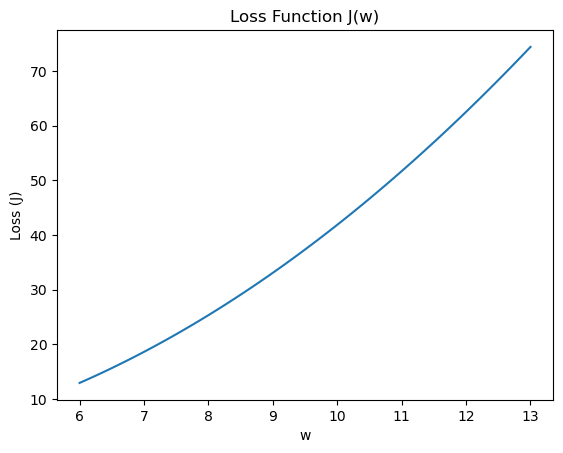

In [451]:
import numpy as np
import matplotlib.pyplot as plt

def compute_loss(W, X, y, b):
    m = len(y)
    predictions = np.dot(X, W) + b
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

b = 1.0  # define b
w_values = np.linspace(6, 13, 100)
loss_values = []

for w_val in w_values:
    w = np.array([w_val, -3.0]).reshape((2, 1))
    loss = compute_loss(w, X, y, b)  # pass b as an argument
    loss_values.append(loss)

plt.plot(w_values, loss_values)
plt.xlabel('w')
plt.ylabel('Loss (J)')
plt.title('Loss Function J(w)')
plt.show()

##### The gradients of loss with respect to w:

$$ \frac{dJ}{dw} = \frac{\delta J}{\delta w} = \lim_{\epsilon \to 0} \frac{J(w+\epsilon) - J(w)}{\epsilon} $$

In [454]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [455]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [-1.35128869]


# Compute loss
##### Extend the linear model and add a function to compute loss.

#### The loss over m examples:
$$ J = 1/2m \sum_{i=1}^{m} (y - \hat{y})^{2} $$

In [458]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [459]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [460]:
loss

5.084657724535137

# Implement the backward pass
##### The process of computing the gradients of the loss function to the model parameters.
##### A crucial step in the training process, as it allows us to update the model parameters using the gradient descent algorithm.

#### The gradient of loss with respect to bias can be calculated with:

$$ \frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)}) $$

$$ \frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)}). x_j^{(i)} $$

In [465]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0) #Although not necessary now, keep it for clarity
        return dW, db

In [466]:
# Calculate gradients dW and db
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [467]:
print(dW, db)

[-2.11024051  3.63730323] -0.46037087423769835


# Update parameters
##### Update the parameters with gradients obtained with backward pass.

In [469]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - db

# Implement the final training loop

In [471]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print("Iter: {}, loss: {:.4f}".format(i, loss)) #to keep track of the loss value
        return losses

In [472]:
model = Model(2)

In [473]:
x_train, y_train = generate_examples()

In [474]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, loss: 9.0358
Iter: 100, loss: 4.5898
Iter: 200, loss: 2.4803
Iter: 300, loss: 1.3408
Iter: 400, loss: 0.7250
Iter: 500, loss: 0.3921
Iter: 600, loss: 0.2122
Iter: 700, loss: 0.1148
Iter: 800, loss: 0.0622
Iter: 900, loss: 0.0337


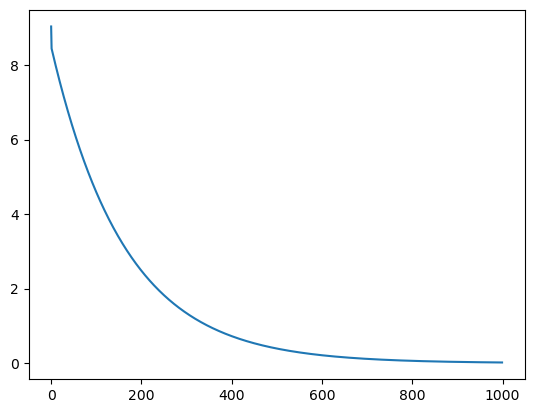

In [475]:
plt.plot(losses);

# Predictions

In [477]:
# Get predictions from an untrained model for comparison
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [478]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

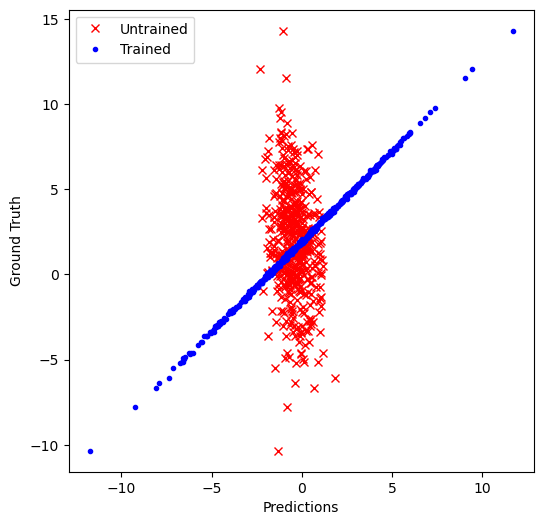

In [479]:
# PLot the predictions obtained from the trained vs the untrained model.
plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, "rx", label = "Untrained")
plt.plot(preds_trained, y_test, "b.", label = "Trained")
plt.legend()
plt.xlabel("Predictions")
plt.ylabel("Ground Truth")
plt.show()